In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('BlinkIT-Grocery-Data (1).csv')

In [2]:
print(df.head())

   ItemFat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Siz0e        Outlet Type  Item Visibility  Item Weight     Sales  \
0       Medium  Supermarket Type1         0.100014        15.10  145.4786   
1       Medium  Supermarket Type2         0.008596  

In [3]:
df.columns.tolist()

[' ItemFat Content',
 'Item Identifier',
 'Item Type',
 'Outlet Establishment Year',
 'Outlet Identifier',
 'Outlet Location Type',
 'Outlet Siz0e',
 'Outlet Type',
 'Item Visibility',
 'Item Weight',
 'Sales',
 'Rating']

In [4]:
df['Item Type'].unique()

array(['Fruits and Vegetables', 'Health and Hygiene', 'Frozen Foods',
       'Canned', 'Soft Drinks', 'Household', 'Snack Foods', 'Meat',
       'Breads', 'Hard Drinks', 'Others', 'Dairy', 'Breakfast',
       'Baking Goods', 'Seafood', 'Starchy Foods'], dtype=object)

In [5]:
print(df.describe())

       Outlet Establishment Year  Item Visibility  Item Weight        Sales  \
count                8523.000000      8523.000000  7060.000000  8523.000000   
mean                 2016.450546         0.066132    12.857645   140.992783   
std                     3.189396         0.051598     4.643456    62.275067   
min                  2011.000000         0.000000     4.555000    31.290000   
25%                  2014.000000         0.026989     8.773750    93.826500   
50%                  2016.000000         0.053931    12.600000   143.012800   
75%                  2018.000000         0.094585    16.850000   185.643700   
max                  2022.000000         0.328391    21.350000   266.888400   

            Rating  
count  8523.000000  
mean      3.965857  
std       0.605651  
min       1.000000  
25%       4.000000  
50%       4.000000  
75%       4.200000  
max       5.000000  


In [6]:
popular_products = df['Item Identifier'].value_counts().head(10)
print(popular_products)

Item Identifier
FDG33    10
FDW13    10
FDW26     9
NCQ06     9
FDX20     9
FDF52     9
DRE49     9
NCI54     9
FDF56     9
FDD38     9
Name: count, dtype: int64


In [7]:
popular_categories = df['Item Type'].value_counts().head(10)
print(popular_categories)

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: count, dtype: int64


In [ ]:
# Calculate total sales
total_sales = df['Sales'].sum()
print(f"Total Sales: {total_sales}")


Total Sales: 1201681.4928


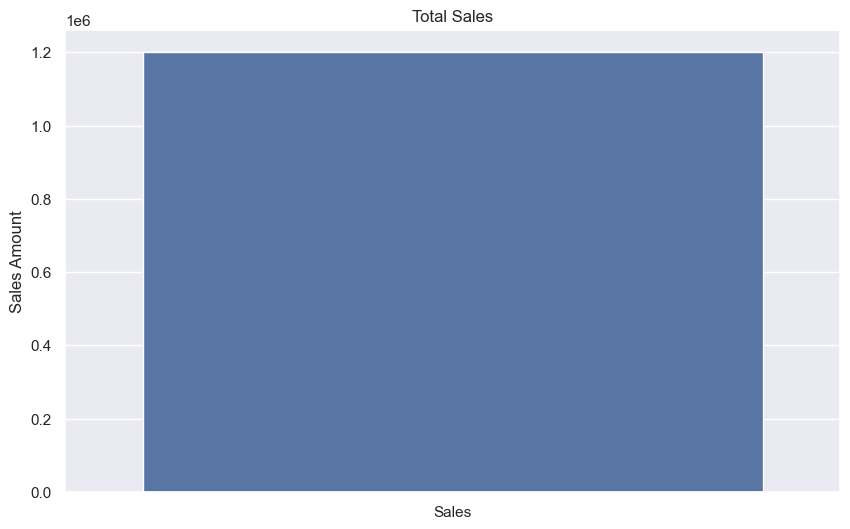

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total sales
plt.figure(figsize=(10, 6))
sns.barplot(x=['Sales'], y=[total_sales])
plt.title('Total Sales')
plt.ylabel('Sales Amount')
plt.show()


In [ ]:
#Check the first few rows of the dataset
print(df.head())
# Calculate the distribution of outlet sizes
outlet_size_distribution = df['Outlet Siz0e'].value_counts()

   ItemFat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Siz0e        Outlet Type  Item Visibility  Item Weight     Sales  \
0       Medium  Supermarket Type1         0.100014        15.10  145.4786   
1       Medium  Supermarket Type2         0.008596  

In [ ]:
# Calculate the total number of items sold for each product
# items_sold = df.groupby('Item Identifier')[''].sum().reset_index()
# items_sold = items_sold.sort_values(by='quantity', ascending=False).head(10)
# print(items_sold)


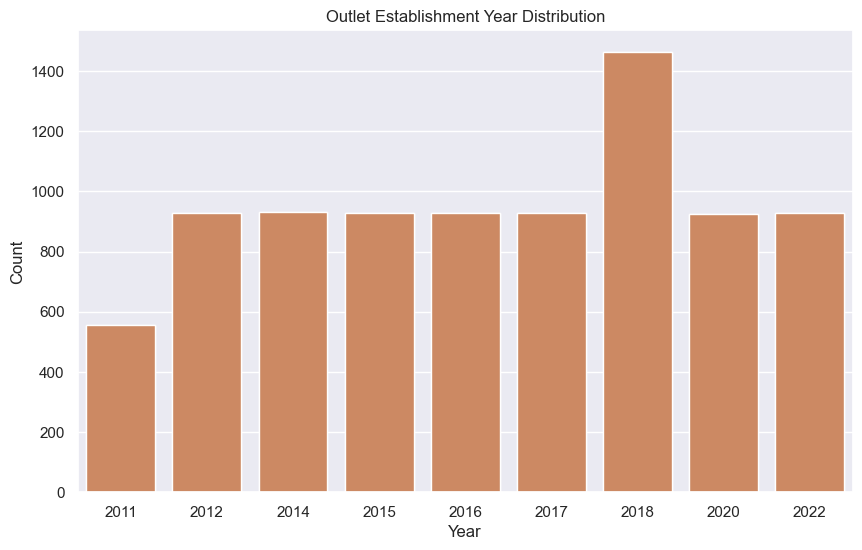

In [ ]:

import seaborn as sns
# Set the theme for seaborn
sns.set_theme()

# Visualization of Outlet Establishment Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Outlet Establishment Year')
sns.countplot(data=df, x='Outlet Establishment Year')
plt.title('Outlet Establishment Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


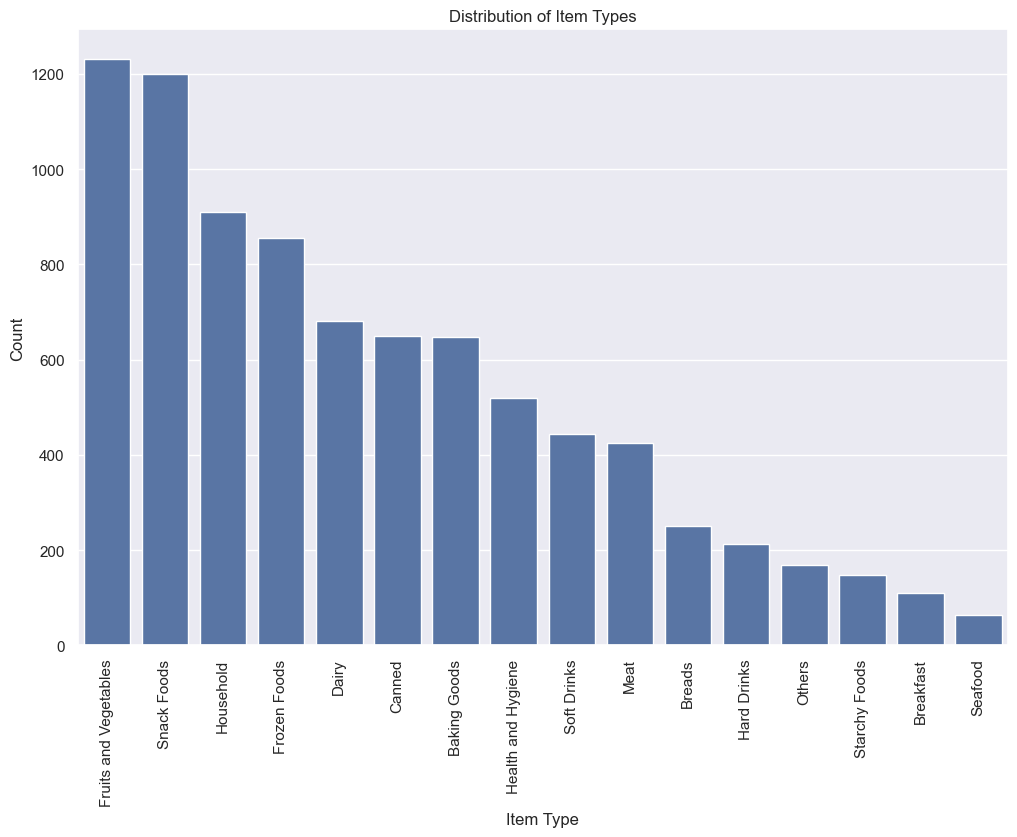

In [ ]:
# Visualization of Item Types
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Item Type', order=df['Item Type'].value_counts().index)
plt.title('Distribution of Item Types')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a bar plot for total sales
fig = go.Figure(data=[go.Bar(x=['Sales'], y=[total_sales])])

# Update the layout
fig.update_layout(
    title='Total Sales',
    xaxis_title='Sales',
    yaxis_title='Sales Amount',
    template='plotly_white'
)

fig.show()


In [ ]:
import plotly.express as px

# Custom color palette for the pie chart
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

# Create a more attractive pie chart for outlet size distribution
fig = px.pie(values=outlet_size_distribution, 
            names=outlet_size_distribution.index, 
            title='Distribution of Outlet Sizes',
            hole=0.3, 
            color_discrete_sequence=colors)

# Update the layout for aesthetics
fig.update_traces(
    textinfo='percent+label', 
    hoverinfo='label+percent+value',  # Show label, percentage, and value on hover
    pull=[0.05]*len(outlet_size_distribution),  # Pull slices out slightly for emphasis
    marker=dict(line=dict(color='white', width=2))  # Add white borders around slices
)

# Customizing the overall layout
fig.update_layout(
    title_font_size=22,  # Larger title font
    title_x=0.5,  # Center the title
    annotations=[dict(text='Outlet Sizes', x=0.5, y=0.5, font_size=18, showarrow=False)],  # Add text in the donut hole
    showlegend=True,  # Show legend
    legend=dict(
        font_size=12,  # Increase legend font size
        bgcolor='rgba(0,0,0,0)',  # Transparent legend background
    ),
    template='plotly_white'  # Use a  theme for a vibrant look
)

fig.show()


In [ ]:
import plotly.express as px

# Create a count plot for 'Outlet Establishment Year' using Plotly
# First, we create a DataFrame with counts and sort it
year_counts = df['Outlet Establishment Year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']  # Rename columns for clarity
year_counts.sort_values('Year', inplace=True)  # Sort by Year

# Create a histogram with multi-colors
fig = px.bar(
    year_counts, 
    x='Year', 
    y='Count', 
    title='Outlet Establishment Year Distribution',
    color='Year',  # Use Year for color differentiation
    color_discrete_sequence=px.colors.qualitative.Plotly  # Use a qualitative color palette
)

# Update the layout for aesthetics
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count',
    title_x=0.5,  # Center the title
    template='plotly_white',  # Use a white theme
    bargap=0.3,  # Add space between bars
    plot_bgcolor='white',  # White plot background
    paper_bgcolor='white',  # White paper background
)

# Adding labels on top of the bars
fig.update_traces(
    texttemplate='%{y}',  # Show the count value
    textposition='outside',  # Position text above the bars
    marker=dict(line=dict(color='black', width=1))  # Add black border around bars
)

# Customize hover information
fig.update_traces(hoverinfo='x+y', hovertemplate='Year: %{x}<br>Count: %{y}<extra></extra>')

# Show the plot
fig.show()


In [ ]:
import plotly.express as px

# Create a count plot for 'Item Type' using Plotly
item_counts = df['Item Type'].value_counts().reset_index()
item_counts.columns = ['Item Type', 'Count']  # Rename columns for clarity

# Create a bar chart with multi-color
fig = px.bar(
    item_counts, 
    x='Item Type', 
    y='Count', 
    title='Distribution of Item Types',
    color='Item Type',  # Use Item Type for color differentiation
    color_discrete_sequence=px.colors.qualitative.Plotly  # Use a qualitative color palette
)

# Update layout for aesthetics
fig.update_layout(
    xaxis_title='Item Type',
    yaxis_title='Count',
    title_x=0.5,  # Center the title
    template='plotly_white',  # Use a white theme
    xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility
    paper_bgcolor='white',  # White paper background
    plot_bgcolor='white',  # White plot background
    height=600,  # Increase height for better visibility
    width=900,   # Increase width for better visibility
    font=dict(size=14),  # Increase font size
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),  # Add gridlines
    yaxis=dict(showgrid=True, gridcolor='lightgrey')   # Add gridlines
)

# Adding labels on top of the bars
fig.update_traces(
    texttemplate='%{y}',  # Show the count value
    textposition='outside',  # Position text above the bars
    marker=dict(line=dict(color='black', width=1))  # Add black border around bars
)

# Customize hover information
fig.update_traces(hoverinfo='x+y', hovertemplate='Item Type: %{x}<br>Count: %{y}<extra></extra>')

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Assuming df is already defined and contains your data

# Create a new column for 'Year'
df['Year'] = df['Outlet Establishment Year']

# Group by 'Year' and sum the 'Sales'
year_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Create the animated line plot
fig = px.line(year_sales, 
            x='Year', 
            y='Sales', 
            title='Sales Trends Over Time (by Year of Outlet Establishment)',
            labels={'Sales': 'Total Sales', 'Year': 'Year'},
            width=800, height=500)

# Add a frame for animation
fig.update_traces(mode='lines+markers')  # Add markers to the line
fig.update_layout(transition_duration=500)  # Duration of the animation transition

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Data for outlet location type distribution
data = {
    'Outlet Location Type': ['Urban', 'Suburban', 'Rural'],
    'Percentage': [39, 33, 28]  # Given percentages for each location type
}

# Create a DataFrame
outlet_location_distribution = pd.DataFrame(data)

# Create the bar chart
fig = px.bar(
    outlet_location_distribution,
    x='Outlet Location Type',
    y='Percentage',
    title='Distribution of Outlet Location Types',
    labels={'Percentage': 'Percentage (%)', 'Outlet Location Type': 'Outlet Location Type'},
    color='Outlet Location Type',  # Color differentiation by outlet type
    width=800, height=500
)

# Update layout for better aesthetics
fig.update_layout(
    template='plotly_white',
    paper_bgcolor='white',
    font=dict(size=14),
    title_x=0.5,  # Center the title
)

# Show the plot
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Data for Outlet Type distribution
data = {
    'Outlet Type': ['Supermarket ', 'Grocery Store', 'Other'],
    'Percentage': [65, 13, 22]  # Provided percentages
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a bar chart
fig = px.bar(
    df,
    x='Outlet Type',
    y='Percentage',
    title='Outlet Type Distribution',
    labels={'Percentage': 'Percentage (%)', 'Outlet Type': 'Outlet Type'},
    color='Outlet Type',  # Color differentiation by Outlet Type
    color_discrete_map={
        'Supermarket ': 'blue',
        'Grocery Store': 'orange',
        'Other': 'green'
    },
    width=700,
    height=500
)

# Customize layout for better aesthetics
fig.update_layout(
    title_x=0.5,  # Center the title
    template='plotly_white',
    paper_bgcolor='white',
    font=dict(size=14),
)

# Show the plot
fig.show()
